In [115]:
import torch
import torchfcn
import torchvision
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import fcn

### Understand the datasets for training and cross-validation

In [116]:
# Assume the datasets are downloaded to the loc. below
root = osp.expanduser('~/data/datasets')

#### Pixel label values 

In [117]:
# Map of the classe names for example 1 - aeroplane
class_names = np.array([
        'background',
        'aeroplane',
        'bicycle',
        'bird',
        'boat',
        'bottle',
        'bus',
        'car',
        'cat',
        'chair',
        'cow',
        'diningtable',
        'dog',
        'horse',
        'motorbike',
        'person',
        'potted plant',
        'sheep',
        'sofa',
        'train',
        'tv/monitor',
    ])

#### Utility functions to show images and histogram

In [118]:
def imshow(img):
    plt.imshow(img)
    plt.show()
    
def hist(img):
    plt.hist(img)
    plt.show()

#### Inspect the train dataset

In [119]:
# The train dataset is Semantic Boundaries Dataset and Benchmark (SBD) benchmark
# . http://home.bharathh.info/pubs/codes/SBD/download.html
# Refer http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/semantic_contours/benchmark.tgz

# Note: we set the transform to False, this ensures that the result of __get_item is an 
# ndarray, not a tensor.
train_dataset = torchfcn.datasets.SBDClassSeg(root, split='train', transform=False)
print(train_dataset)
print(f"Number of entries in the training: {len(train_dataset)}")

Number of entries in the training: 8498


Shape of image:  (480, 360, 3) shape of the label:  (480, 360)


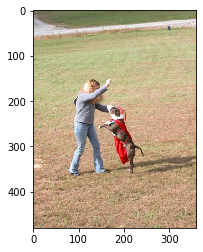

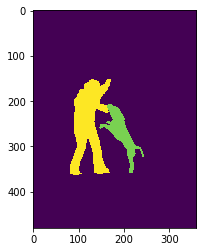

In [90]:
idx = 459
print("Shape of image: ", train_dataset[idx][0].shape, "shape of the label: ", train_dataset[idx][1].shape)
imshow(train_dataset[idx][0])
imshow(train_dataset[idx][1])
# print(train_dataset[idx][1])

#### Print the histogram of the train dataset

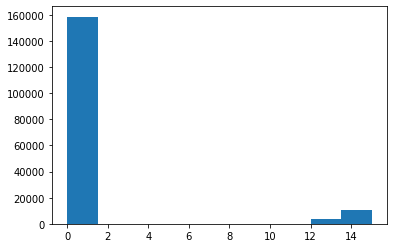

In [88]:
label_dist = np.ravel(train_dataset[idx][1])
hist(label_dist)

#### Understand the validation (dev) dataset

In [ ]:
# Load the validation dataset (Pascal VOC)
# Again note that the transform is False, so the result is an ndarray and not a transformed tensor
valid_dataset = torchfcn.datasets.VOC2011ClassSeg(root, split='seg11valid', transform=False)

Shape of data:  (375, 500, 3) Shape of label:  (375, 500)


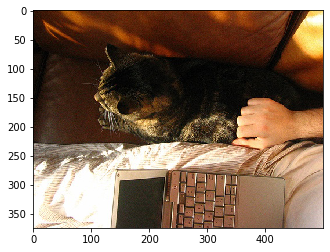

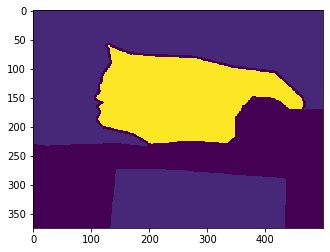

Max 8 Min -1


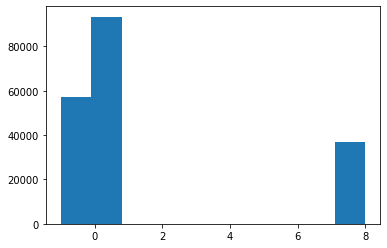

In [91]:
idx = 203

print("Shape of data: ", valid_dataset[idx][0].shape, "Shape of label: ", valid_dataset[idx][1].shape)

imshow(valid_dataset[idx][0])
imshow(valid_dataset[idx][1])

label_dist = np.ravel(valid_dataset[idx][1])
print("Max", np.max(label_dist), "Min", np.min(label_dist))
hist(label_dist)

#### Inspect the transformed tensor

In [ ]:
## Let us actually inspect the transformed tensor data instead
valid_tensor_dataset = torchfcn.datasets.VOC2011ClassSeg(root, split='seg11valid', transform=True)

label_dists = valid_tensor_dataset[idx][1]
print(torch.min(label_dists))

label_dist = np.ravel(label_dists.numpy())
print("Max", np.max(label_dist), "Min", np.min(label_dist))
hist(label_dist)

#### Inspect the dataset transformed?

In [107]:
mean_bgr = np.array([104.00698793, 116.66876762, 122.67891434])

def transform(img):
    #img = img[:, :, ::-1]  # RGB -> BGR
    img = img.astype(np.float64)
    img -= mean_bgr
    return img

In [108]:
print(valid_dataset[idx][0].shape)
transformed_image = transform(valid_dataset[idx][0])
print(transformed_image.shape)

(375, 500, 3)
(375, 500, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


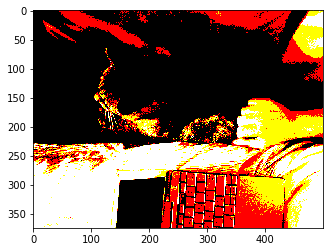

In [109]:
imshow(transformed_image)

#### Notes

* https://stats.stackexchange.com/questions/211436/why-normalize-images-by-subtracting-datasets-image-mean-instead-of-the-current

* https://github.com/ry/tensorflow-resnet/blob/master/convert.py#L51